<a href="https://colab.research.google.com/github/martinagonz/ML_hospital_EV1/blob/main/Hospital_admissions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üè•Hospital Admmissions Data EDA

Integrantes:
*   Martina Gonzalez
*   Raquel Rehbein




# 1Ô∏è‚É£ Business Understanding (Comprensi√≥n del Negocio)

### Contexto del problema
Las enfermedades cardiovasculares representan una de las principales causas de hospitalizaci√≥n y mortalidad a nivel mundial.  
El presente dataset proviene del **Hero DMC Heart Institute** (India) y contiene informaci√≥n de m√°s de **12 mil pacientes hospitalizados entre 2017 y 2019**, incluyendo datos demogr√°ficos, antecedentes cl√≠nicos, comorbilidades, par√°metros de laboratorio y desenlaces hospitalarios (alta o fallecimiento).  

### Hip√≥tesis
> ‚ÄúLa mortalidad hospitalaria est√° asociada a factores demogr√°ficos (edad, g√©nero, zona rural/urbana) y comorbilidades (diabetes, hipertensi√≥n, enfermedad coronaria previa, insuficiencia card√≠aca), de manera que ciertos perfiles de pacientes presentan mayor riesgo de desenlace negativo.‚Äù

### Objetivo general
Identificar los **factores de riesgo** que se relacionan con la mortalidad hospitalaria, explorando patrones en:  
- Estancia hospitalaria.  
- Enfermedades preexistentes.  
- Caracter√≠sticas demogr√°ficas.  

### Valor del proyecto
El an√°lisis de estos datos permitir√°:  
- Reconocer variables relevantes asociadas al riesgo de mortalidad.  
- Generar conocimiento √∫til para **modelos predictivos de riesgo cl√≠nico**.  
- Contribuir a la toma de decisiones en la gesti√≥n hospitalaria y el cuidado de pacientes con enfermedades card√≠acas.  

### Posibles tareas de Machine Learning
- **Clasificaci√≥n**: predecir si un paciente ser√° dado de alta o fallecer√° durante la hospitalizaci√≥n.  
- **Regresi√≥n**: predecir variables continuas relacionadas (ej: duraci√≥n de la estancia hospitalaria, valores de laboratorio).  


# 2Ô∏è‚É£ Data Understanding (Comprensi√≥n de los Datos)

En esta fase se explora la estructura y caracter√≠sticas de los datos disponibles.  
El proyecto cuenta con **tres tablas principales** que pueden ser integradas para el an√°lisis de mortalidad hospitalaria:

---

## üìä  Admission Data
Contiene el **perfil cl√≠nico inicial de cada paciente** hospitalizado:
- Identificaci√≥n y tiempos de hospitalizaci√≥n: n√∫mero de admisi√≥n, fechas de ingreso/alta, duraci√≥n de estancia y UCI.
- Datos demogr√°ficos: edad, g√©nero, procedencia (rural/urbana), tipo de admisi√≥n (emergencia/ambulatoria).
- Factores de estilo de vida: tabaquismo, alcohol.
- Comorbilidades: diabetes (DM), hipertensi√≥n (HTN), enfermedad coronaria (CAD), miocardiopat√≠a (CMP), enfermedad renal cr√≥nica (CKD).
- Par√°metros de laboratorio: hemoglobina (HB), leucocitos (TLC), plaquetas, glucosa, urea, creatinina, BNP, enzimas card√≠acas elevadas.
- Diagn√≥sticos y complicaciones: anemia, angina, s√≠ndrome coronario agudo (ACS), infarto (STEMI), insuficiencia card√≠aca (HFREF, HFNEF), valvulopat√≠as, arritmias, embolia pulmonar, shock, infecciones, entre otras.
- Resultado: **OUTCOME** (alta, fallecimiento, alta voluntaria).

üëâ Esta tabla es la **base principal** para construir los *features cl√≠nicos* del modelo.

---

## ‚ö∞Ô∏è  Mortality Data
Registra informaci√≥n de pacientes que fallecieron:
- Edad, g√©nero, procedencia.
- Fecha de muerte (o ingreso fallecido).
- Relacionado al n√∫mero de admisi√≥n.

üëâ Se utiliza para validar y reforzar el **target de mortalidad hospitalaria** (clasificaci√≥n binaria: sobrevivi√≥ / falleci√≥).

---

## üåç  Pollution Data
Incluye variables ambientales y meteorol√≥gicas por fecha:
- Calidad del aire: AQI (Air Quality Index).
- Contaminantes atmosf√©ricos: PM2.5, PM10, NO‚ÇÇ, NH‚ÇÉ, SO‚ÇÇ, CO, Ozono (valores promedio, m√≠nimo y m√°ximo).
- Contaminante predominante del d√≠a.
- Clima: temperatura m√°xima, temperatura m√≠nima, humedad relativa.

üëâ Se puede relacionar por **fecha de ingreso** para estudiar c√≥mo la contaminaci√≥n y el clima influyen en la mortalidad hospitalaria y en complicaciones cardiovasculares.

---



https://www.kaggle.com/datasets/ashishsahani/hospital-admissions-data

###Importar librerias y cargar datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import pandas as pd

# Subir primer archivo admission
uploaded = files.upload()
df_adm = pd.read_csv(next(iter(uploaded)), sep=",", encoding="latin-1")

# Subir segundo archivo mortality
uploaded = files.upload()
df_mor = pd.read_csv(next(iter(uploaded)), sep=",", encoding="latin-1")

# Subir tercer archivo pollution
uploaded = files.upload()
df_pol = pd.read_csv(next(iter(uploaded)), sep=",", encoding="latin-1")


Saving HDHI Admission data.csv to HDHI Admission data.csv


Saving HDHI Mortality Data.csv to HDHI Mortality Data.csv


Saving HDHI Pollution Data.csv to HDHI Pollution Data.csv


###Revisi√≥n general

In [ ]:
# Revisar las primeras filas
print(df_adm.head())
print(df_mor.head())
print(df_pol.head())

   √Ø¬ª¬øSNO MRD No.     D.O.A      D.O.D  AGE GENDER RURAL  \
0       1  234735  4/1/2017   4/3/2017   81      M     R   
1       2  234696  4/1/2017   4/5/2017   65      M     R   
2       3  234882  4/1/2017   4/3/2017   53      M     U   
3       4  234635  4/1/2017   4/8/2017   67      F     U   
4       5  234486  4/1/2017  4/23/2017   60      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                               E     Apr-17                 3  ...   
1                               E     Apr-17                 5  ...   
2                               E     Apr-17                 3  ...   
3                               E     Apr-17                 8  ...   
4                               E     Apr-17                23  ...   

   CONGENITAL UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0           0   0                          0            0   
1           0   0                          0            0   
2           0   0         

In [ ]:
# Revisar informaci√≥n b√°sica y tipos de datos
print(df_adm.info())
print(df_mor.info())
print(df_pol.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   √Ø¬ª¬øSNO                           15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                      

üëÄObservaciones\
Admission (df_adm)

* Filas: 15.757


* Columnas: 56

* Muchos int64 y object, incluyendo algunas columnas num√©ricas como HB, TLC, PLATELETS, GLUCOSE que est√°n como object.

* Algunas columnas tienen valores nulos: HB, TLC, PLATELETS, GLUCOSE, UREA, CREATININE, BNP, EF.

* Formato de fechas (D.O.A, D.O.D) es object, necesita convertir a datetime.

* Hay un problema de codificaci√≥n: la primera columna aparece como √Ø¬ª¬øSNO, t√≠pico de archivos UTF-8 con BOM.

Mortality (df_mor)

* Filas: 359

* Columnas principales: AGE, GENDER, RURAL/URBAN, DATE OF BROUGHT DEAD

* La fecha tambi√©n est√° como object ‚Üí necesita datetime.

* Primer columna tambi√©n con BOM (√Ø¬ª¬øS.NO).

*Pollution (df_pol)

* Filas: 737

* Columnas: 27

* Varias columnas num√©ricas est√°n como object (PM10 MAX, NO2 MAX, OZONE MAX) ‚Üí hay que convertirlas a float/int.

* Algunas columnas tienen valores nulos, por ejemplo HUMIDITY.

* La fecha est√° como object ‚Üí datetime.

* Primer columna con BOM (√Ø¬ª¬øDATE).

In [ ]:
# Revisar si hay valores nulos
print(df_adm.isnull().sum())
print(df_mor.isnull().sum())
print(df_pol.isnull().sum())

√Ø¬ª¬øSNO                                0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                                241
CREATININE                          2

üëÄObservaciones sobre valores nulos\
Admission (df_adm)

-Columnas con muchos nulos:

* BNP: 8.441 nulos ‚Üí casi la mitad de los registros

* EF: 1.505 nulos

-Columnas con pocos nulos:

* HB, TLC, PLATELETS, GLUCOSE, UREA, CREATININE ‚Üí entre 241 y 863 nulos

El resto de las columnas est√°n completas.

Mortality (df_mor)

* No tiene valores nulos.

Pollution (df_pol)

* Solo HUMIDITY tiene 4 nulos en 737 filas ‚Üí despreciable. ‚úÖ

###Estadistica de datos

In [ ]:
df_adm.describe().T

count         mean          std  min  \
√Ø¬ª¬øSNO                           15757.0  7879.000000  4548.798431  1.0   
AGE                              15757.0    61.426160    13.420862  4.0   
DURATION OF STAY                 15757.0     6.415054     5.011421  1.0   
duration of intensive unit stay  15757.0     3.803770     4.015640  0.0   
SMOKING                          15757.0     0.050327     0.218625  0.0   
ALCOHOL                          15757.0     0.064797     0.246174  0.0   
DM                               15757.0     0.323475     0.467817  0.0   
HTN                              15757.0     0.485879     0.499816  0.0   
CAD                              15757.0     0.669607     0.470369  0.0   
PRIOR CMP                        15757.0     0.154471     0.361411  0.0   
CKD                              15757.0     0.098369     0.297822  0.0   
RAISED CARDIAC ENZYMES           15757.0     0.198134     0.398606  0.0   
SEVERE ANAEMIA                   15757.0     0.019356     0.137779  0.0   
ANAEMIA                          15757.0     0.176874     0.381574  0.0   
STABLE ANGINA                    15757.0     0.081805     0.274076  0.0   
ACS                              15757.0     0.365742     0.481653  0.0   
STEMI                            15757.0     0.139747     0.346736  0.0   
ATYPICAL CHEST PAIN              15757.0     0.025576     0.157871  0.0   
HEART FAILURE                    15757.0     0.289459     0.453526  0.0   
HFREF                            15757.0     0.153646     0.360621  0.0   
HFNEF                            15757.0     0.136574     0.343408  0.0   
VALVULAR                         15757.0     0.035032     0.183867  0.0   
CHB                              15757.0     0.026147     0.159578  0.0   
SSS                              15757.0     0.006791     0.082128  0.0   
AKI                              15757.0     0.222377     0.415857  0.0   
CVA INFRACT                      15757.0     0.029447     0.169062  0.0   
CVA BLEED                        15757.0     0.004252     0.065071  0.0   
AF                               15757.0     0.050771     0.219537  0.0   
VT                               15757.0     0.032938     0.178479  0.0   
PSVT                             15757.0     0.007552     0.086577  0.0   
CONGENITAL                       15757.0     0.010472     0.101797  0.0   
UTI                              15757.0     0.061877     0.240940  0.0   
NEURO CARDIOGENIC SYNCOPE        15757.0     0.008377     0.091146  0.0   
ORTHOSTATIC                      15757.0     0.007870     0.088363  0.0   
INFECTIVE ENDOCARDITIS           15757.0     0.001840     0.042862  0.0   
DVT                              15757.0     0.013264     0.114406  0.0   
CARDIOGENIC SHOCK                15757.0     0.059910     0.237327  0.0   
SHOCK                            15757.0     0.046646     0.210886  0.0   
PULMONARY EMBOLISM               15757.0     0.015358     0.122977  0.0   

                                    25%     50%      75%      max  
√Ø¬ª¬øSNO                           3940.0  7879.0  11818.0  15757.0  
AGE                                54.0    62.0     70.0    110.0  
DURATION OF STAY                    3.0     5.0      8.0     98.0  
duration of intensive unit stay     1.0     3.0      5.0     58.0  
SMOKING                             0.0     0.0      0.0      1.0  
ALCOHOL                             0.0     0.0      0.0      1.0  
DM                                  0.0     0.0      1.0      1.0  
HTN                                 0.0     0.0      1.0      1.0  
CAD                                 0.0     1.0      1.0      1.0  
PRIOR CMP                           0.0     0.0      0.0      1.0  
CKD                                 0.0     0.0      0.0      1.0  
RAISED CARDIAC ENZYMES              0.0     0.0      0.0      1.0  
SEVERE ANAEMIA                      0.0     0.0      0.0      1.0  
ANAEMIA                             0.0     0.0      0.0      1.0  
STABLE A

In [ ]:
df_pol.describe().T

count        mean         std   min    25%    50%    75%    max
AQI        737.0  127.477612   82.960653  28.0   77.0  105.0  151.0  797.0
PM2.5 AVG  737.0  111.949796   75.889697  11.0   62.0   91.0  134.0  419.0
PM2.5 MIN  737.0   51.985075   45.899300   1.0   23.0   43.0   67.0  317.0
PM2.5 MAX  737.0  200.017639  112.484810  18.0  100.0  180.0  296.0  500.0
PM10 AVG   737.0  113.526459   69.938247  18.0   71.0   94.0  134.0  486.0
PM10 MIN   737.0   68.687924   42.054575   1.0   38.0   62.0   87.0  265.0
NO2 AVG    737.0   32.594301   54.859179   1.0   14.0   16.0   30.0  797.0
NO2 MIN    737.0   22.443691   29.397850   1.0    7.0   13.0   25.0  270.0
NH3 AVG    737.0    6.393487    9.929499   1.0    1.0    4.0   10.0  188.0
NH3 MIN    737.0    4.900950    4.671515   1.0    1.0    3.0    9.0   19.0
NH3 MAX    737.0    8.630936   16.591791   1.0    2.0    5.0   11.0  250.0
SO2 AVG    737.0   10.822252    7.118534   2.0    6.0   10.0   13.0   88.0
SO2 MIN    737.0    3.495251    2.890726   1.0    1.0    2.0    5.0   19.0
SO2 MAX    737.0   25.234735   20.600311   3.0   12.0   20.0   29.0  157.0
CO AVG     737.0   35.484396   14.637934   5.0   26.0   35.0   43.0  100.0
CO MIN     737.0   15.868385   10.171774   1.0    8.0   15.0   23.0   48.0
CO MAX     737.0   62.305292   25.485351   7.0   45.0   57.0   78.0  183.0
OZONE AVG  737.0   22.781547   13.464316   3.0   12.0   19.0   32.0   78.0
OZONE MIN  737.0    9.096336    6.631832   1.0    4.0    8.0   11.0   46.0
MAX TEMP   737.0   32.260516    7.471502  17.0   26.0   34.0   38.0   48.0
MIN TEMP   737.0   20.065129    7.687235   5.0   13.0   21.0   27.0   34.0
HUMIDITY   733.0   40.618008   17.951781   5.0   26.0   38.0   54.0   92.0

In [ ]:
df_mor.describe().T

count        mean         std  min   25%    50%    75%    max
√Ø¬ª¬øS.NO  359.0  180.000000  103.778611  1.0  90.5  180.0  269.5  359.0
AGE      359.0   62.651811   13.133976  5.0  55.0   63.0   72.0   95.0

##Clasificacion de variables
---

##  Admission (`df_adm`)

### **Categ√≥ricas nominales**

* `gender`, `rural`, `type_of_admission-emergency/opd`, `outcome`, `chest_infection`

### **Categ√≥ricas ordinales**

* Ninguna expl√≠cita en tus datasets (si tuvieras severidad de enfermedad o clase cl√≠nica, entrar√≠an aqu√≠)

### **Num√©ricas continuas**

* `age`, `duration_of_stay`, `duration_of_intensive_unit_stay`, `hb`, `tlc`, `platelets`, `glucose`, `urea`, `creatinine`, `ef`

### **Num√©ricas discretas**

* `smoking`, `alcohol`, `dm`, `htn`, `cad`, `prior_cmp`, `ckd`, `raised_cardiac_enzymes`, `severe_anaemia`, `anaemia`, `stable_angina`, `acs`, `stemi`, `atypical_chest_pain`, `heart_failure`, `hfref`, `hfnef`, `valvular`, `chb`, `sss`, `aki`, `cva_infract`, `cva_bleed`, `af`, `vt`, `psvt`, `congenital`, `uti`, `neuro_cardiogenic_syncope`, `orthostatic`, `infective_endocarditis`, `dvt`, `cardiogenic_shock`, `shock`, `pulmonary_embolism`

---

##  Mortality (`df_mor`)

### **Categ√≥ricas nominales**

* `gender`, `rural/urban`

### **Categ√≥ricas ordinales**

* Ninguna expl√≠cita

### **Num√©ricas continuas**

* `age`

### **Num√©ricas discretas**

* Ninguna expl√≠cita (aunque podr√≠as considerar `S.NO` como ID)

---

##  Pollution (`df_pol`)

### **Categ√≥ricas nominales**

* `prominent_pollutent`

### **Categ√≥ricas ordinales**

* Ninguna expl√≠cita

### **Num√©ricas continuas**

* `aqi`, `pm2.5 avg`, `pm2.5 min`, `pm2.5 max`, `pm10 avg`, `pm10 min`, `pm10 max`, `no2 avg`, `no2 min`, `no2 max`, `nh3 avg`, `nh3 min`, `nh3 max`, `so2 avg`, `so2 min`, `so2 max`, `co avg`, `co min`, `co max`, `ozone avg`, `ozone min`, `ozone max`, `max temp`, `min temp`, `humidity`

### **Num√©ricas discretas**

* Ninguna expl√≠cita (aunque podr√≠as considerar AQI como entero contable, depende del an√°lisis)

---



Exploramos el perfil de los pacientes segun su:
* EDAD
* GENERO
* ZONA
* COMORBILIDADES

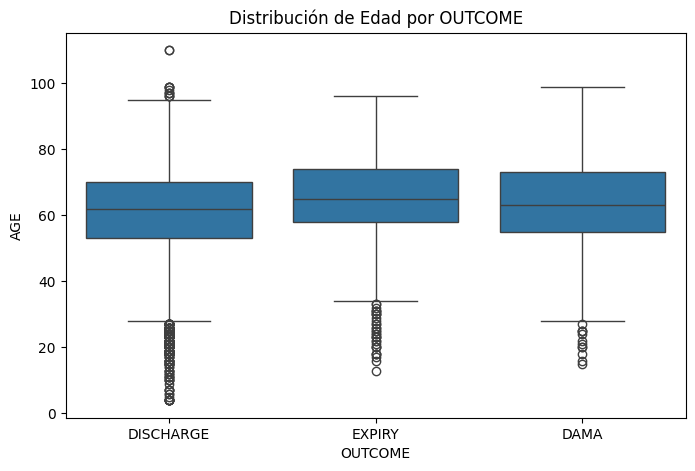

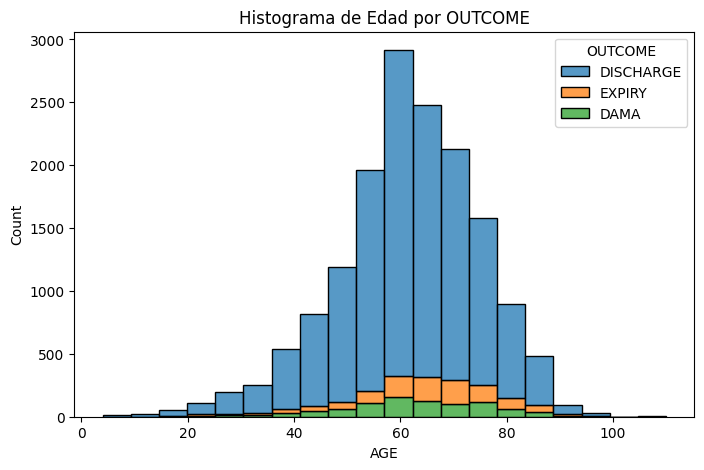

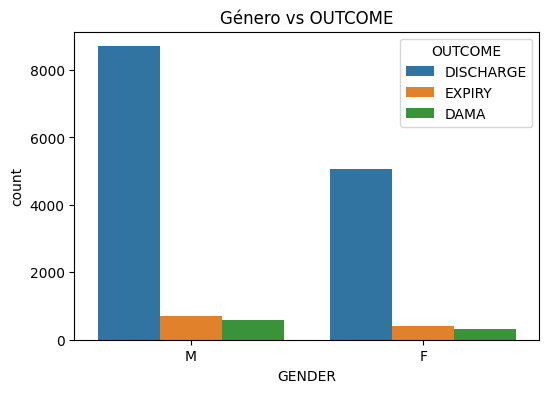

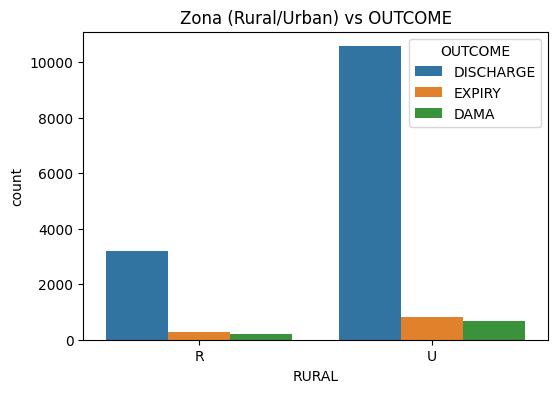

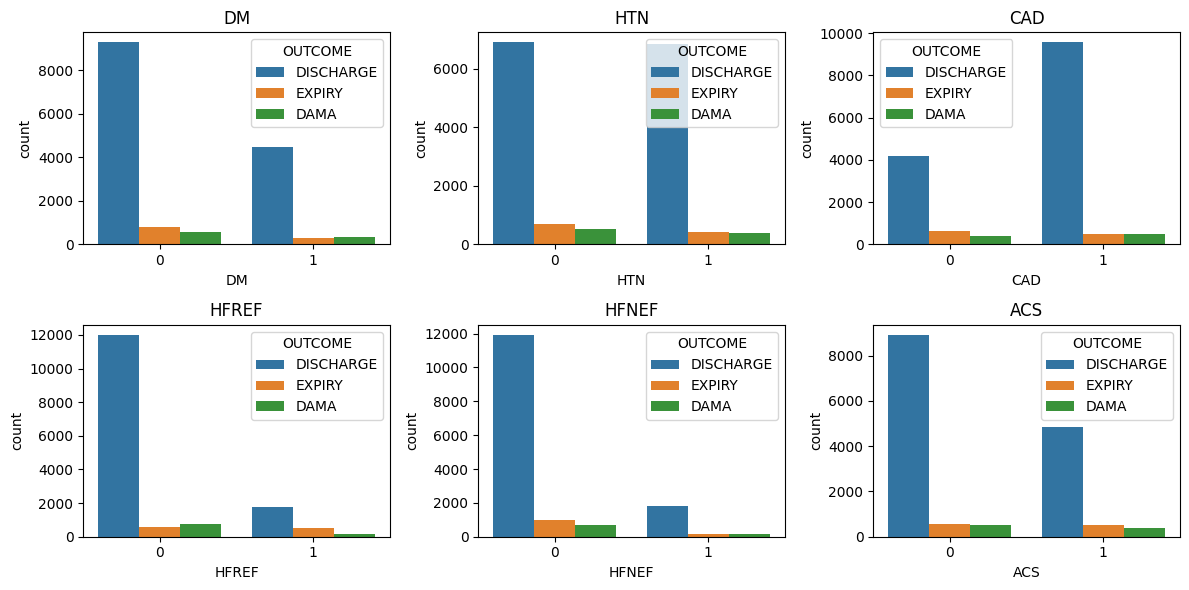

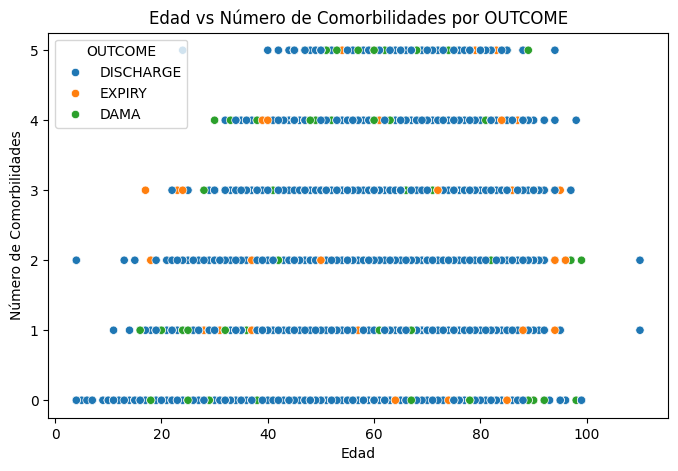

In [ ]:
# ===============================
# 1Ô∏è‚É£ Edad
# ===============================
plt.figure(figsize=(8,5))
sns.boxplot(x='OUTCOME', y='AGE', data=df_adm)
plt.title("Distribuci√≥n de Edad por OUTCOME")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_adm, x='AGE', hue='OUTCOME', multiple='stack', bins=20)
plt.title("Histograma de Edad por OUTCOME")
plt.show()

# ===============================
# 2Ô∏è‚É£ G√©nero
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(x='GENDER', hue='OUTCOME', data=df_adm)
plt.title("G√©nero vs OUTCOME")
plt.show()

# ===============================
# 3Ô∏è‚É£ Zona
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(x='RURAL', hue='OUTCOME', data=df_adm)
plt.title("Zona (Rural/Urban) vs OUTCOME")
plt.show()

# ===============================
# 4Ô∏è‚É£ Comorbilidades
# ===============================
comorbidities = ['DM','HTN','CAD','HFREF','HFNEF','ACS']

plt.figure(figsize=(12,6))
for i, col in enumerate(comorbidities):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, hue='OUTCOME', data=df_adm)
    plt.title(col)
plt.tight_layout()
plt.show()

# ===============================
# 5Ô∏è‚É£ Combinaci√≥n: Edad vs N√∫mero de Comorbilidades
# ===============================
# Crear columna temporal con n√∫mero de comorbilidades (solo para visualizaci√≥n)
df_adm['num_comorbidities'] = df_adm[comorbidities].sum(axis=1)

plt.figure(figsize=(8,5))
sns.scatterplot(x='AGE', y='num_comorbidities', hue='OUTCOME', data=df_adm)
plt.title("Edad vs N√∫mero de Comorbilidades por OUTCOME")
plt.xlabel("Edad")
plt.ylabel("N√∫mero de Comorbilidades")
plt.show()

# Borrar columna temporal si quieres mantener el dataset original intacto
df_adm.drop(columns=['num_comorbidities'], inplace=True)

Analisis de df mortabily

In [ ]:
# Limpiar nombres de columna: quitar espacios y caracteres extra√±os, poner todo en min√∫sculas
df_mor.columns = df_mor.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('√Ø¬ª¬ø','')

# Revisar columnas
print(df_mor.columns)


Index(['s.no', 'mrd', 'age', 'gender', 'rural/urban', 'date_of_brought_dead'], dtype='object')



=== Frecuencia de g√©nero en df_mor ===
gender
M    236
F    123
Name: count, dtype: int64


/tmp/ipython-input-3311398908.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_mor, palette='pastel')


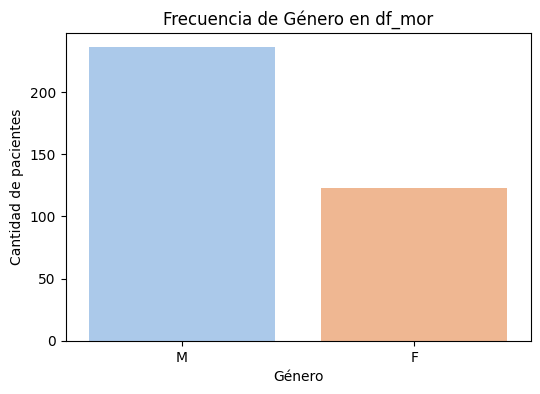

/tmp/ipython-input-3311398908.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rural/urban', data=df_mor, palette='muted')


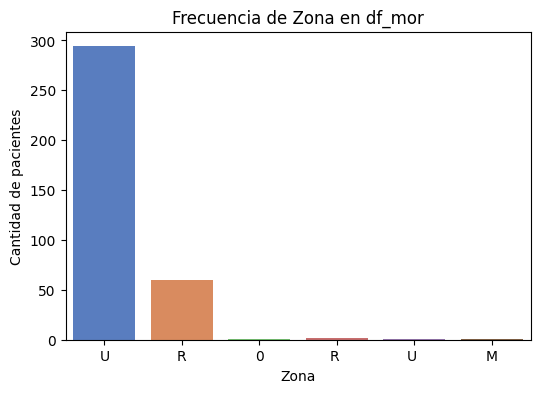


=== Frecuencia de zona (RURAL/URBAN) en df_mor ===
rural/urban
U     294
R      60
R       2
0       1
U       1
M       1
Name: count, dtype: int64


In [ ]:
# Frecuencia de g√©nero
print("\n=== Frecuencia de g√©nero en df_mor ===")
print(df_mor['gender'].value_counts())


# ===============================
# Frecuencia de g√©nero
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df_mor, palette='pastel')
plt.title("Frecuencia de G√©nero en df_mor")
plt.xlabel("G√©nero")
plt.ylabel("Cantidad de pacientes")
plt.show()

# ===============================
# Frecuencia de zona (RURAL/URBAN)
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(x='rural/urban', data=df_mor, palette='muted')
plt.title("Frecuencia de Zona en df_mor")
plt.xlabel("Zona")
plt.ylabel("Cantidad de pacientes")
plt.show()
# Frecuencia de zona
print("\n=== Frecuencia de zona (RURAL/URBAN) en df_mor ===")
print(df_mor['rural/urban'].value_counts())

Valores en la comuna zona que se repiten o inv√°lidos

Analisis dataset pollution

In [ ]:
# Limpiar columnas: todo en min√∫scula, sin espacios
df_pol.columns = df_pol.columns.str.strip().str.lower().str.replace(' ', '_')

# Revisar nombres reales
print(df_pol.columns.tolist())

['√Ø¬ª¬ødate', 'aqi', 'pm2.5_avg', 'pm2.5_min', 'pm2.5_max', 'pm10_avg', 'pm10_min', 'pm10_max', 'no2_avg', 'no2_min', 'no2_max', 'nh3_avg', 'nh3_min', 'nh3_max', 'so2_avg', 'so2_min', 'so2_max', 'co_avg', 'co_min', 'co_max', 'ozone_avg', 'ozone_min', 'ozone_max', 'prominent_pollutent', 'max_temp', 'min_temp', 'humidity']


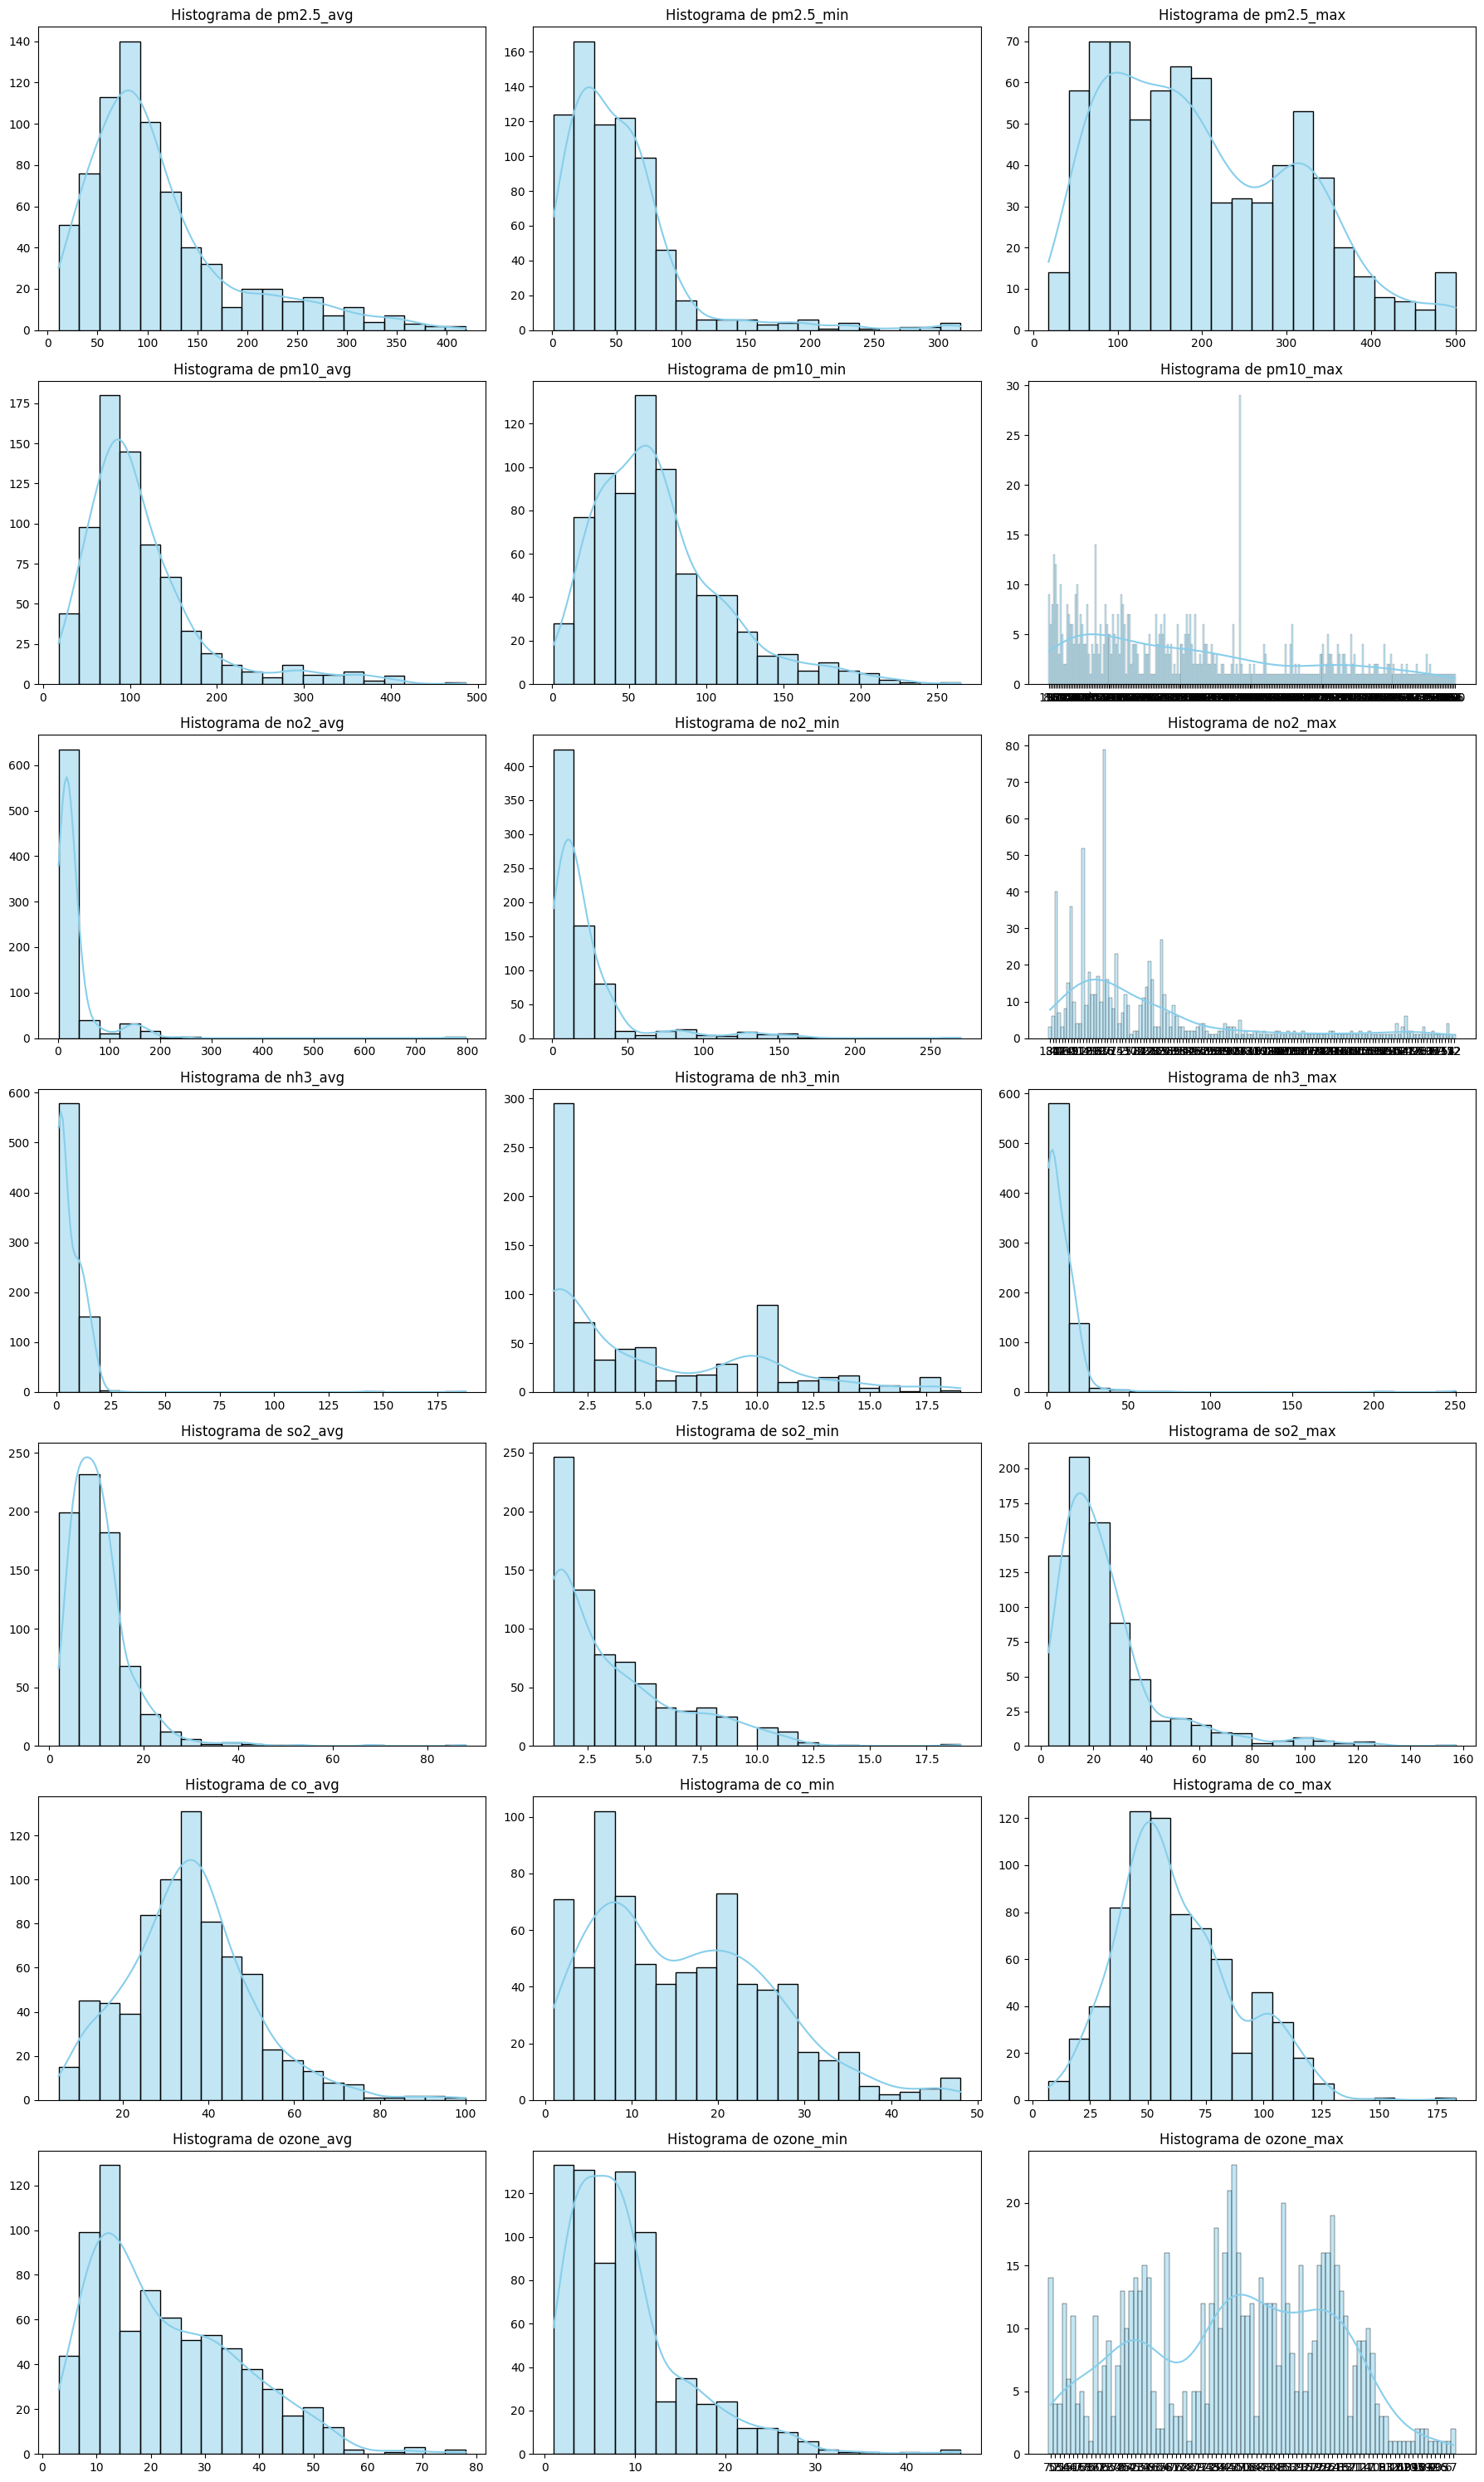

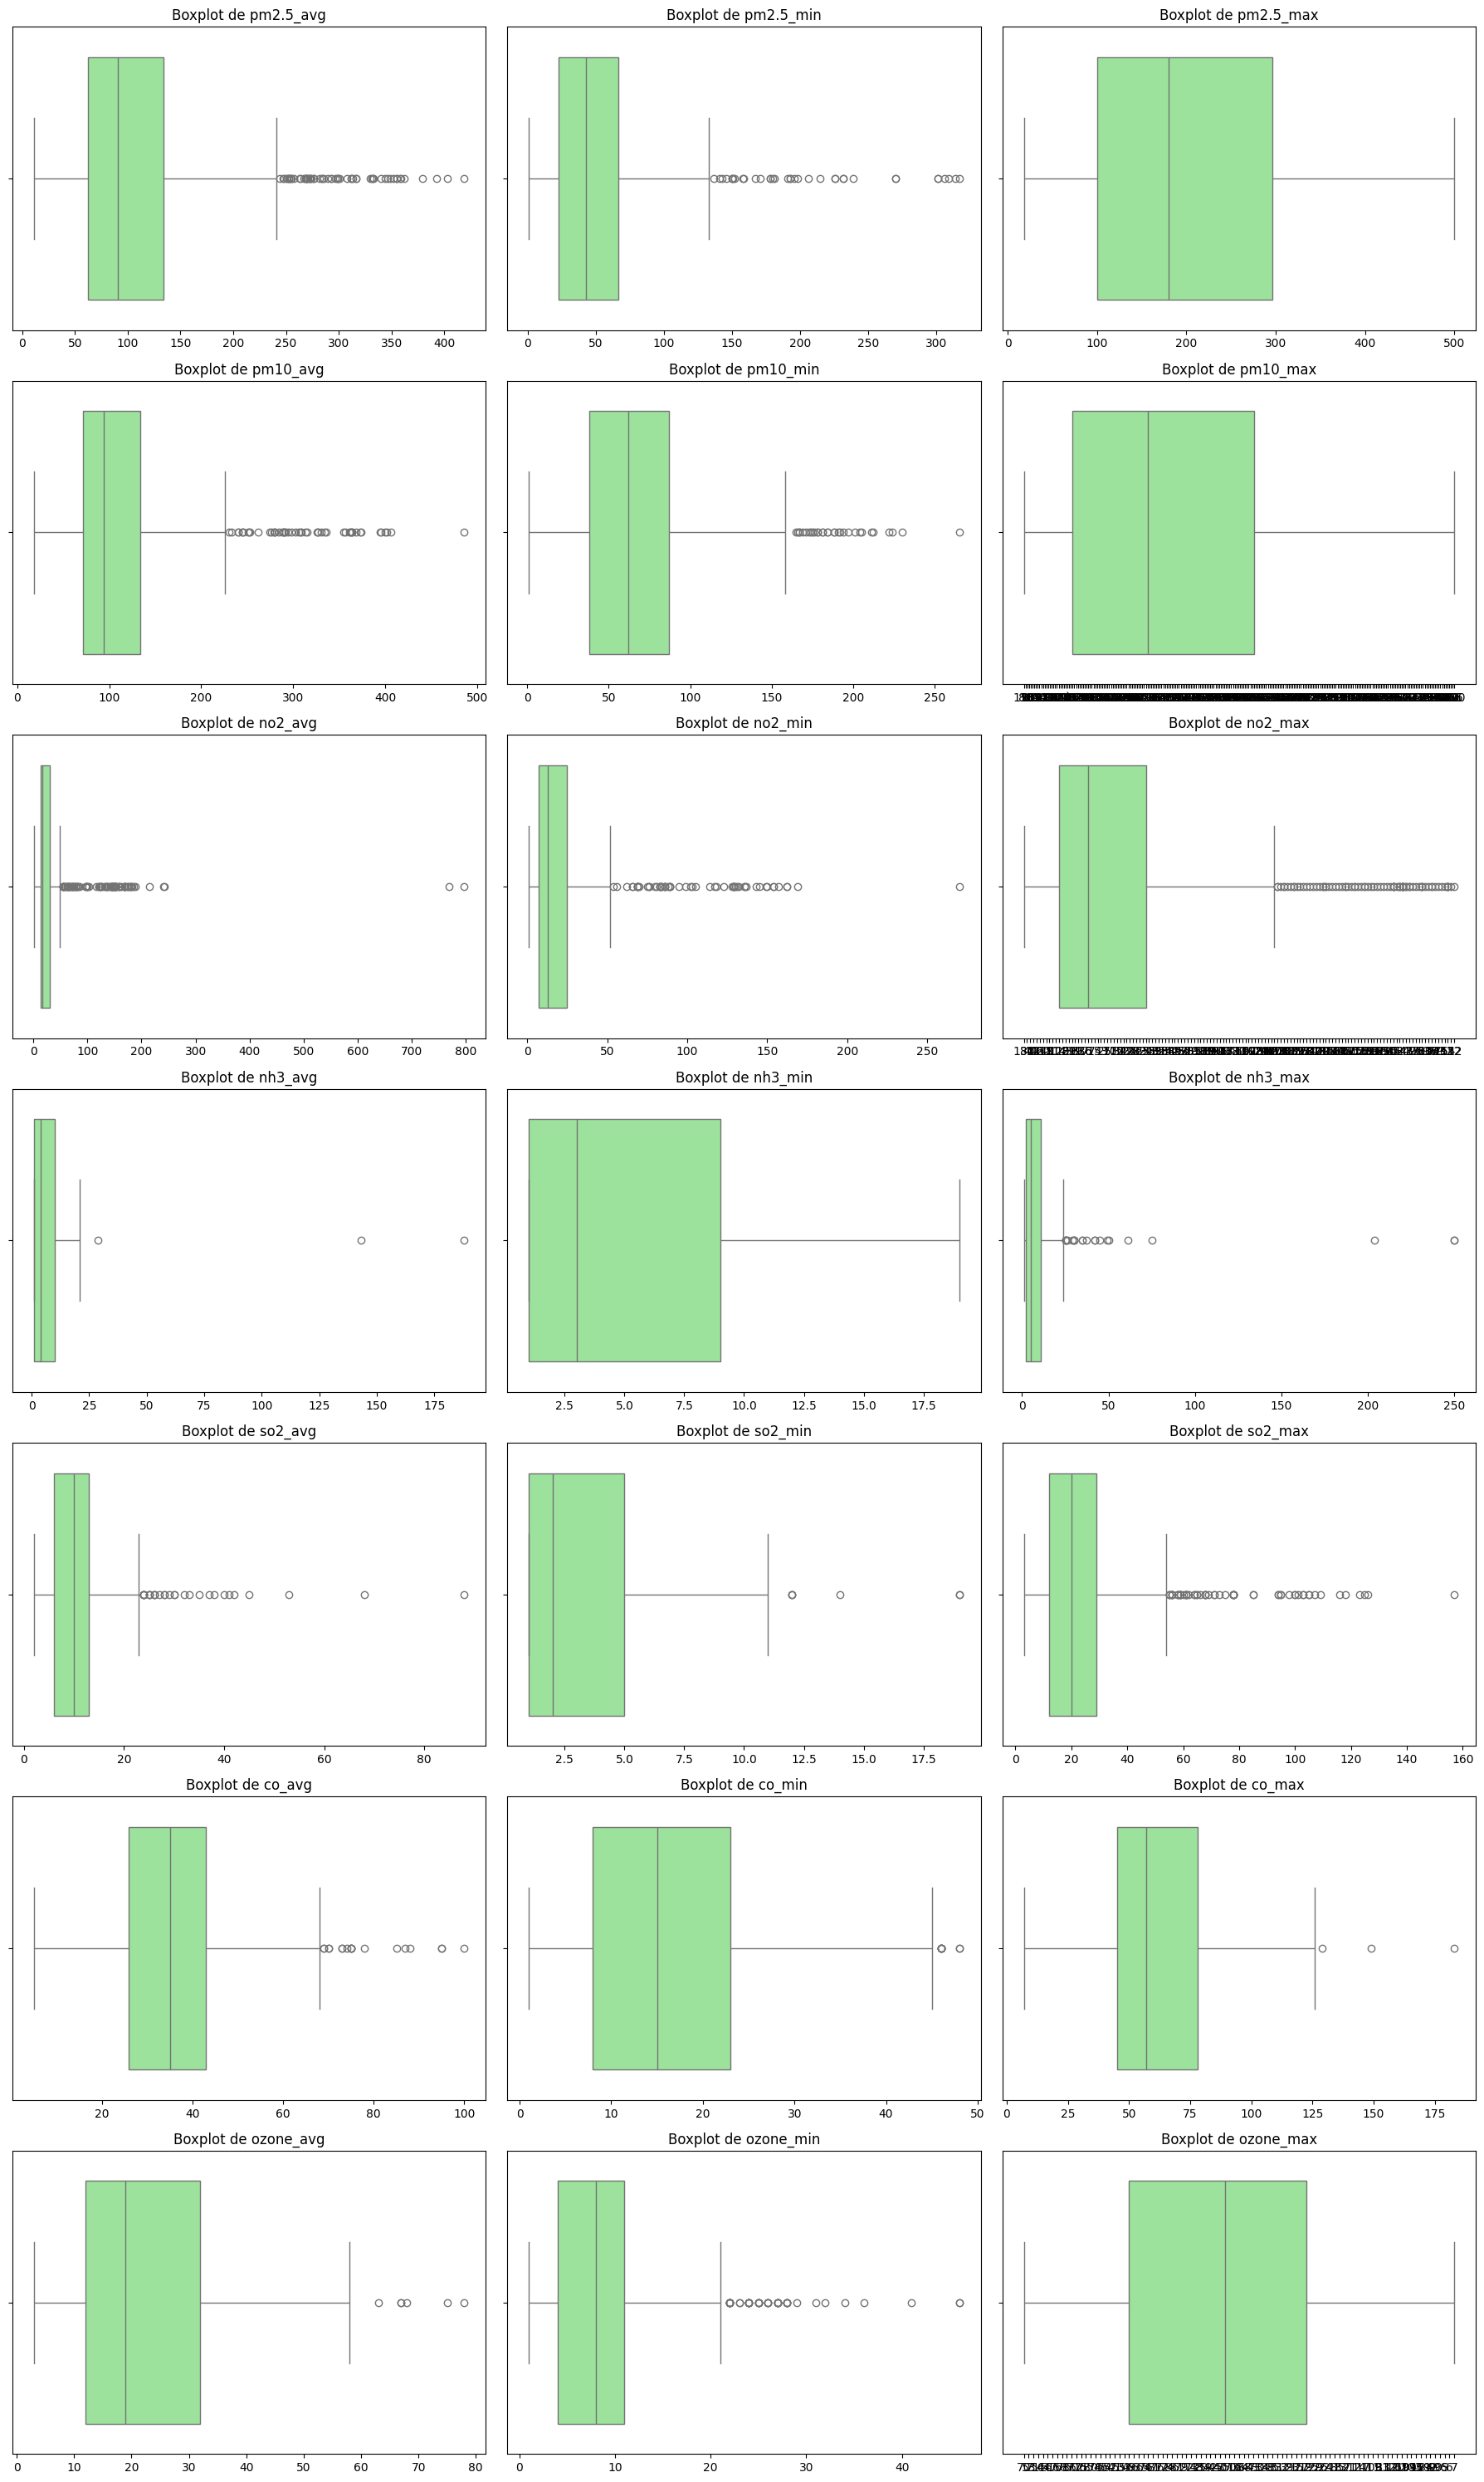

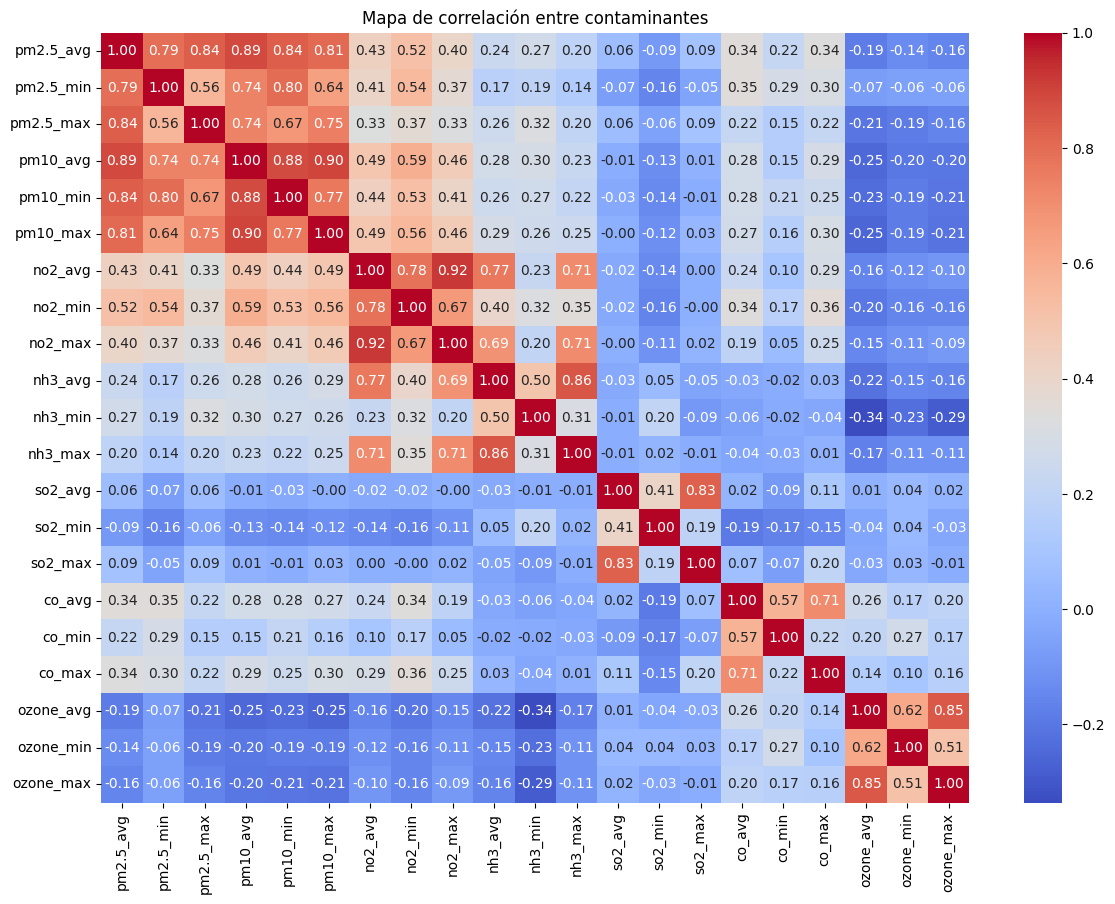

In [ ]:

# ===============================
# Definir columnas de contaminantes
# ===============================
contaminantes = ['pm2.5_avg','pm2.5_min','pm2.5_max',
                 'pm10_avg','pm10_min','pm10_max',
                 'no2_avg','no2_min','no2_max',
                 'nh3_avg','nh3_min','nh3_max',
                 'so2_avg','so2_min','so2_max',
                 'co_avg','co_min','co_max',
                 'ozone_avg','ozone_min','ozone_max']

# ===============================
# Histogramas en subplots (3 por fila)
# ===============================
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18, 30))  # 21 columnas = 7 filas x 3
axes = axes.flatten()

for i, col in enumerate(contaminantes):
    sns.histplot(df_pol[col], bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Histograma de {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Quitar gr√°ficos vac√≠os si sobran
for j in range(len(contaminantes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ===============================
# Boxplots en subplots (3 por fila)
# ===============================
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18, 30))
axes = axes.flatten()

for i, col in enumerate(contaminantes):
    sns.boxplot(x=df_pol[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_xlabel("")

# Quitar gr√°ficos vac√≠os si sobran
for j in range(len(contaminantes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ===============================
# Heatmap de correlaci√≥n
# ===============================
df_pol[contaminantes] = df_pol[contaminantes].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(14,10))
sns.heatmap(df_pol[contaminantes].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa de correlaci√≥n entre contaminantes")
plt.show()


Combinacion de tablas

/tmp/ipython-input-945159178.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='murio_final', y='duration_of_stay', data=df_adm_mor, palette='Set2', showfliers=False)


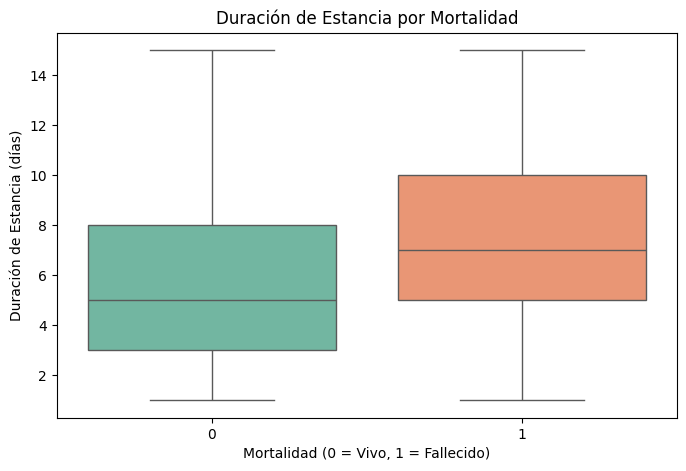

/tmp/ipython-input-945159178.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='heart_failure', y='age', data=df_adm_mor, palette='coolwarm', showfliers=False)


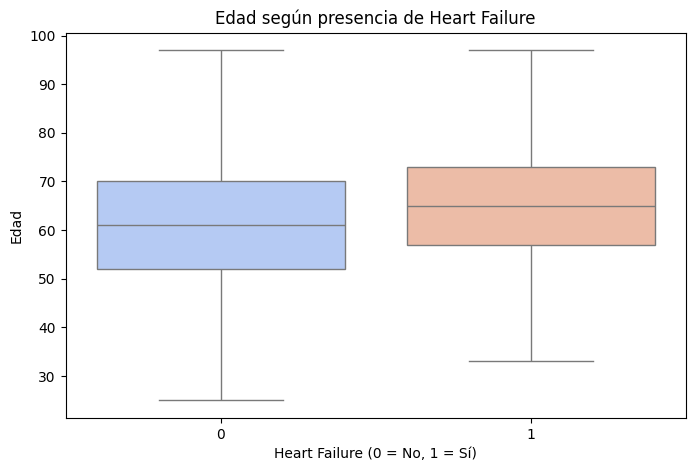

/tmp/ipython-input-945159178.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dm', y='age', data=df_adm_mor, palette='magma', showfliers=False)


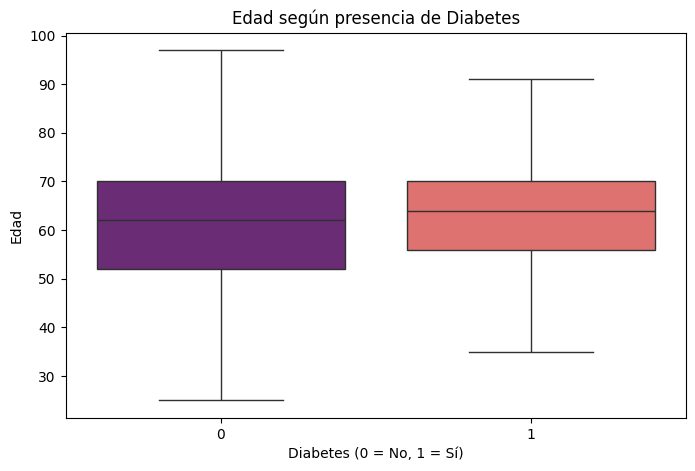

In [ ]:
# Ensure columns are numeric for plotting
df_adm_mor['heart_failure'] = pd.to_numeric(df_adm_mor['heart_failure'], errors='coerce')
df_adm_mor['dm'] = pd.to_numeric(df_adm_mor['dm'], errors='coerce')


# -----------------------------
# 1Ô∏è‚É£ Boxplot: Duraci√≥n de estancia vs Mortalidad
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='murio_final', y='duration_of_stay', data=df_adm_mor, palette='Set2', showfliers=False)
plt.title("Duraci√≥n de Estancia por Mortalidad")
plt.xlabel("Mortalidad (0 = Vivo, 1 = Fallecido)")
plt.ylabel("Duraci√≥n de Estancia (d√≠as)")
plt.show()

# -----------------------------
# 2Ô∏è‚É£ Boxplot: Edad vs Heart Failure
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='heart_failure', y='age', data=df_adm_mor, palette='coolwarm', showfliers=False)
plt.title("Edad seg√∫n presencia de Heart Failure")
plt.xlabel("Heart Failure (0 = No, 1 = S√≠)")
plt.ylabel("Edad")
plt.show()

# -----------------------------
# 3Ô∏è‚É£ Boxplot: Edad vs Diabetes
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='dm', y='age', data=df_adm_mor, palette='magma', showfliers=False)
plt.title("Edad seg√∫n presencia de Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = S√≠)")
plt.ylabel("Edad")
plt.show()

In [ ]:
# Normalizar columnas clave
df_adm.columns = df_adm.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('√Ø¬ª¬ø','')
df_mor.columns = df_mor.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('√Ø¬ª¬ø','')

# Hacer merge por MRD
df_join = df_adm.merge(df_mor, left_on="mrd_no.", right_on="mrd", how="outer", suffixes=('_adm', '_mor'))

print("Total registros en Admission:", len(df_adm))
print("Total registros en Mortality:", len(df_mor))
print("Total tras el join:", len(df_join))

# Print columns of df_join to diagnose the KeyError
print("\nColumns in df_join:")
print(df_join.columns.tolist())

# Pacientes que est√°n en admission pero no en mortality
only_adm = df_join[df_join['date_of_brought_dead'].isna()]
print("Pacientes solo en Admission:", len(only_adm))

# Pacientes que est√°n en mortality pero no en admission
only_mor = df_join[df_join['date_of_admission_adm'].isna()]
print("Pacientes solo en Mortality:", len(only_mor))

# Revisar inconsistencias de fechas
invalid_dates = df_join[
    (df_join['date_of_brought_dead'].notna()) &
    (df_join['date_of_admission_adm'].notna()) &
    (df_join['date_of_brought_dead'] < df_join['date_of_admission_adm'])
]
print("Inconsistencias de fechas encontradas:", len(invalid_dates))

Total registros en Admission: 15757
Total registros en Mortality: 359
Total tras el join: 16076

Columns in df_join:
['sno', 'mrd_no.', 'date_of_admission', 'date_of_discharge', 'age_adm', 'gender_adm', 'rural', 'type_of_admission-emergency/opd', 'month_year', 'duration_of_stay', 'duration_of_intensive_unit_stay', 'outcome', 'smoking', 'alcohol', 'dm', 'htn', 'cad', 'prior_cmp', 'ckd', 'hb', 'tlc', 'platelets', 'glucose', 'urea', 'creatinine', 'raised_cardiac_enzymes', 'ef', 'severe_anaemia', 'anaemia', 'stable_angina', 'acs', 'stemi', 'atypical_chest_pain', 'heart_failure', 'hfref', 'hfnef', 'valvular', 'chb', 'sss', 'aki', 'cva_infract', 'cva_bleed', 'af', 'vt', 'psvt', 'congenital', 'uti', 'neuro_cardiogenic_syncope', 'orthostatic', 'infective_endocarditis', 'dvt', 'cardiogenic_shock', 'shock', 'pulmonary_embolism', 'chest_infection', 's.no', 'mrd', 'age_mor', 'gender_mor', 'rural/urban', 'date_of_brought_dead', 'murio', 'rural/urban_clean']
Pacientes solo en Admission: 15694


KeyError: 'date_of_admission_adm'

Analisis de correlaciones

In [ ]:
# ============================
# 1. Preparaci√≥n de mortalidad
# ============================
df_mor["murio"] = 1
df_adm_mor = df_adm.merge(
    df_mor[["mrd","murio"]],
    left_on="mrd_no.", right_on="mrd",
    how="left"
)

# Mortalidad final (death en Outcome o aparece en Mortality)
df_adm_mor["murio"] = df_adm_mor["murio"].fillna(0)
df_adm_mor["murio_final"] = (
    (df_adm_mor["murio"] == 1) |
    (df_adm_mor["outcome"].astype(str).str.lower().str.contains("death"))
).astype(int)

# ============================
# 2. Normalizar variables
# ============================
df_num = df_adm_mor.copy()

# Convertir comorbilidades and chest_infection to numeric
cols_to_numeric = ["smoking","alcohol","dm","htn","cad","ckd","anaemia",
                 "heart_failure","acs","stemi","cva_infract","cva_bleed", "chest_infection"]

for col in cols_to_numeric:
    if col in df_num.columns:
        df_num[col] = pd.to_numeric(df_num[col], errors='coerce')

# ============================
# 3. Calcular correlaciones
# ============================
# Select only numeric columns for correlation
df_num_corr = df_num.select_dtypes(include=['number'])
corrs = df_num_corr.corr()["murio_final"].drop("murio_final").sort_values(ascending=False)

# Top 10 correlaciones
top10 = corrs.head(10)
print("=== Top 10 correlaciones con mortalidad ===")
print(top10)

=== Top 10 correlaciones con mortalidad ===
murio                     1.000000
infective_endocarditis    0.067100
heart_failure             0.036250
hfnef                     0.032718
prior_cmp                 0.030687
dm                        0.026223
ckd                       0.022465
duration_of_stay          0.017213
age                       0.016182
hfref                     0.014298
Name: murio_final, dtype: float64


Observaciones del Top 10

* Infective Endocarditis ‚Üí 0.067

Es la variable m√°s correlacionada con mortalidad. Esto tiene sentido, ya que es una infecci√≥n grave del coraz√≥n que puede ser letal.

* Heart Failure / HFNEF / Prior CMP / DM / CKD

Todas son enfermedades cr√≥nicas o antecedentes card√≠acos, lo que concuerda con tu hip√≥tesis de que las comorbilidades aumentan riesgo de desenlace negativo.

* Platelets, Duration_of_stay, Age

Valores num√©ricos m√°s d√©biles, pero muestran cierta relaci√≥n: pacientes mayores, con estancias m√°s largas o alteraciones en plaquetas, pueden tener m√°s riesgo.

# 3Ô∏è‚É£Preparaci√≥n de los datos

###Limpieza

In [ ]:
#limpieza de caracteres extra√±os, munisculas, uso de guion bajo en vez de espacios
def clean_columns(df):
    df.columns = df.columns.str.replace('√Ø¬ª¬ø','').str.strip().str.lower().str.replace(" ", "_")
    return df

df_adm = clean_columns(df_adm)
df_mor = clean_columns(df_mor)
df_pol = clean_columns(df_pol)


In [ ]:
# Convertir columnas de fecha
df_adm['d.o.a'] = pd.to_datetime(df_adm['d.o.a'], errors='coerce')
df_adm['d.o.d'] = pd.to_datetime(df_adm['d.o.d'], errors='coerce')
df_mor['date_of_brought_dead'] = pd.to_datetime(df_mor['date_of_brought_dead'], errors='coerce')
df_pol['date'] = pd.to_datetime(df_pol['date'], errors='coerce')

# renombrar columnas para mayor comprension
df_adm.rename(columns={'d.o.a':'date_of_admission', 'd.o.d':'date_of_discharge'}, inplace=True)

In [ ]:
#conversion de columnas numericas que aparecian como tipo object
for col in ['hb','tlc','platelets','glucose','urea','creatinine','bnp','ef']:
    if col in df_adm.columns:
        df_adm[col] = pd.to_numeric(df_adm[col], errors='coerce')

for col in ['pm10_max','no2_max','ozone_max']:
    if col in df_pol.columns:
        df_pol[col] = pd.to_numeric(df_pol[col], errors='coerce')


Antes de tratar valores nulos, analizamos las columnas

In [ ]:
# Columnas con nulos en df_adm
adm_null_cols = ['hb','tlc','platelets','glucose','urea','creatinine','bnp','ef']
print("===== Estad√≠sticas columnas df_adm con nulos =====")
print(df_adm[adm_null_cols].describe())

# Columnas con nulos en df_pol
pol_null_cols = ['humidity']
print("\n===== Estad√≠sticas columnas df_pol con nulos =====")
print(df_pol[pol_null_cols].describe())


===== Estad√≠sticas columnas df_adm con nulos =====
                 hb           tlc     platelets       glucose          urea  \
count  15501.000000  15467.000000  15463.000000  14812.000000  15513.000000   
mean      12.220635     11.524977    238.617025    162.902795     50.161188   
std        2.327900      7.472741    103.827157     84.371718     42.494672   
min        3.000000      0.100000      0.580000      1.200000      0.100000   
25%       10.700000      7.900000    171.000000    106.000000     25.000000   
50%       12.400000     10.100000    226.000000    136.000000     35.000000   
75%       13.900000     13.400000    288.000000    196.000000     58.000000   
max       26.500000    314.000000   1179.000000    888.000000    495.000000   

         creatinine          bnp            ef  
count  15506.000000  6676.000000  14158.000000  
mean       1.343636   817.847244     43.461252  
std        1.197744   997.756165     13.467014  
min        0.065000     4.000000     14.

In [ ]:
# LIMPIEZA E IMPUTACI√ìN DE NULOS
# --- Admission (df_adm) ---
# Columnas con pocos nulos ‚Üí imputar con mediana
for col in ['hb','tlc','platelets','glucose','urea','creatinine','ef']:
    if col in df_adm.columns:
        median_value = df_adm[col].median()
        df_adm[col].fillna(median_value, inplace=True)
        print(f"Columna {col}: valores nulos imputados con mediana = {median_value}")

# Columnas con muchos nulos ‚Üí eliminar del an√°lisis inicial
if 'bnp' in df_adm.columns:
    df_adm.drop(columns=['bnp'], inplace=True)
    print("Columna BNP eliminada por tener demasiados valores nulos.")

# --- Pollution (df_pol) ---
# HUMIDITY: pocos nulos ‚Üí imputar con media
if 'humidity' in df_pol.columns:
    mean_value = df_pol['humidity'].mean()
    df_pol['humidity'].fillna(mean_value, inplace=True)
    print(f"Columna HUMIDITY: valores nulos imputados con media = {mean_value:.2f}")

# --- Mortality (df_mor) ---
# No tiene nulos, nada que hacer
print("Mortality dataset no tiene valores nulos.")

# --- Confirmar limpieza ---
print("\nValores nulos restantes en df_adm:\n", df_adm.isnull().sum())
print("\nValores nulos restantes en df_pol:\n", df_pol.isnull().sum())
print("\nValores nulos restantes en df_mor:\n", df_mor.isnull().sum())


Columna hb: valores nulos imputados con mediana = 12.4
Columna tlc: valores nulos imputados con mediana = 10.1
Columna platelets: valores nulos imputados con mediana = 226.0
Columna glucose: valores nulos imputados con mediana = 136.0
Columna urea: valores nulos imputados con mediana = 35.0
Columna creatinine: valores nulos imputados con mediana = 1.0
Columna ef: valores nulos imputados con mediana = 42.0
Columna BNP eliminada por tener demasiados valores nulos.
Columna HUMIDITY: valores nulos imputados con media = 40.62
Mortality dataset no tiene valores nulos.

Valores nulos restantes en df_adm:
 sno                                   0
mrd_no.                               0
date_of_admission                  5655
date_of_discharge                  5550
age                                   0
gender                                0
rural                                 0
type_of_admission-emergency/opd       0
month_year                            0
duration_of_stay                  

/tmp/ipython-input-185793229.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adm[col].fillna(median_value, inplace=True)
/tmp/ipython-input-185793229.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
# Normalizar valores de rural/urban porque habian valores q se repetian
df_mor['rural/urban_clean'] = df_mor['rural/urban'].str.upper()  # todo en may√∫scula
df_mor['rural/urban_clean'] = df_mor['rural/urban_clean'].replace({'0': None, 'M': None})  # convertir valores incorrectos a NaN


In [ ]:
# 2Ô∏è‚É£ Diabetes Mellitus (DM)
df_join['DIABETES'] = df_join['dm'].fillna(0).apply(lambda x: 1 if x>0 else 0)

In [ ]:
# 3Ô∏è‚É£ Hipertensi√≥n (HTN)
df_join['HIPERTENSION'] = df_join['htn'].fillna(0).apply(lambda x: 1 if x>0 else 0)

In [ ]:
# 4Ô∏è‚É£ Insuficiencia renal (CKD)
df_join['INSUF_RENAL'] = df_join['ckd'].fillna(0).apply(lambda x: 1 if x>0 else 0)

In [ ]:
# 5Ô∏è‚É£ Enfermedad cerebrovascular (CVA)
cva_cols = ['cva_infract', 'cva_bleed']
df_join['ENF_CEREBROVASCULAR'] = df_join[cva_cols].fillna(0).sum(axis=1)
df_join['ENF_CEREBROVASCULAR'] = df_join['ENF_CEREBROVASCULAR'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
# 6Ô∏è‚É£ Insuficiencia card√≠aca
df_join['INSUF_CARDIACA'] = df_join['heart_failure'].fillna(0).apply(lambda x: 1 if x>0 else 0)

In [ ]:
df_join.head(10)

sno mrd_no. date_of_admission date_of_discharge  age_adm gender_adm  \
0     NaN     NaN               NaT               NaT      NaN        NaN   
1  6500.0    1006        2018-02-09        2018-04-07     80.0          M   
2  9467.0  101169        2018-09-07               NaT     64.0          F   
3  6657.0  101189               NaT               NaT     70.0          M   
4  1823.0  101322        2017-07-07        2017-08-04     74.0          F   
5  5195.0  101322        2017-12-16        2017-12-17     74.0          F   
6  5835.0  101322        2018-07-01        2018-08-01     74.0          F   
7  6417.0  101322        2018-02-04        2018-02-06     74.0          F   
8  8170.0  101322        2018-04-05        2018-06-05     74.0          F   
9  4879.0  101766        2017-03-12        2017-12-12     57.0          F   

  rural type_of_admission-emergency/opd month_year  duration_of_stay  ...  \
0   NaN                             NaN        NaN               NaN  ...   
1     U                               E     Feb-18              58.0  ...   
2     U                               O     Jul-18              10.0  ...   
3     U                               O     Feb-18               1.0  ...   
4     U                               E     Jul-17               2.0  ...   
5     U                               O     Dec-17               2.0  ...   
6     U                               E     Jan-18               2.0  ...   
7     U                               O     Feb-18               3.0  ...   
8     U                               E     May-18               3.0  ...   
9     U                               E     Dec-17              10.0  ...   

   pulmonary_embolism chest_infection   s.no  mrd  age_mor  gender_mor  \
0                 NaN             NaN  277.0  ***     66.0           M   
1                 0.0               0    NaN  NaN      NaN         NaN   
2                 0.0               0    NaN  NaN      NaN         NaN   
3                 0.0               0    NaN  NaN      NaN         NaN   
4                 0.0               0    NaN  NaN      NaN         NaN   
5                 0.0               0    NaN  NaN      NaN         NaN   
6                 0.0               0    NaN  NaN      NaN         NaN   
7                 0.0               0    NaN  NaN      NaN         NaN   
8                 0.0               1    NaN  NaN      NaN         NaN   
9                 0.0               0    NaN  NaN      NaN         NaN   

   rural/urban  date_of_brought_dead  murio  rural/urban_clean  
0            U            2017-04-11    1.0                  U  
1          NaN                   NaT    NaN                NaN  
2          NaN                   NaT    NaN                NaN  
3          NaN                   NaT    NaN                NaN  
4          NaN                   NaT    NaN                NaN  
5          NaN                   NaT    NaN                NaN  
6          NaN                   NaT    NaN                NaN  
7          NaN                   NaT    NaN                NaN  
8          NaN                   NaT    NaN                NaN  
9          NaN                   NaT    NaN                NaN  

[10 rows x 63 columns]

In [ ]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16076 entries, 0 to 16075
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   sno                              15758 non-null  float64       
 1   mrd_no.                          15758 non-null  object        
 2   date_of_admission                10102 non-null  datetime64[ns]
 3   date_of_discharge                10207 non-null  datetime64[ns]
 4   age_adm                          15758 non-null  float64       
 5   gender_adm                       15758 non-null  object        
 6   rural                            15758 non-null  object        
 7   type_of_admission-emergency/opd  15758 non-null  object        
 8   month_year                       15758 non-null  object        
 9   duration_of_stay                 15758 non-null  float64       
 10  duration_of_intensive_unit_stay  15758 non-null  float64  

###Eliminacion de outliers

In [ ]:
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lower) | (df[columna] > upper)]
    print(f"Columna: {columna}")
    print(f"Rango aceptado: [{lower:.2f}, {upper:.2f}]")
    print(f"Cantidad de outliers: {len(outliers)}")
    return outliers

# Ejemplo con edad
outliers_age = detectar_outliers(df_join, "age_adm")

# Ejemplo con duraci√≥n de estancia
outliers_stay = detectar_outliers(df_join, "duration_of_stay")


Columna: age_adm
Rango aceptado: [30.00, 94.00]
Cantidad de outliers: 362
Columna: duration_of_stay
Rango aceptado: [-4.50, 15.50]
Cantidad de outliers: 736


In [ ]:
for col in df_join.select_dtypes(include=["float64", "int64"]).columns:
    detectar_outliers(df_join, col)
    print("-"*40)

Columna: sno
Rango aceptado: [-7876.00, 23634.00]
Cantidad de outliers: 0
----------------------------------------
Columna: age_adm
Rango aceptado: [30.00, 94.00]
Cantidad de outliers: 362
----------------------------------------
Columna: duration_of_stay
Rango aceptado: [-4.50, 15.50]
Cantidad de outliers: 736
----------------------------------------
Columna: duration_of_intensive_unit_stay
Rango aceptado: [-5.00, 11.00]
Cantidad de outliers: 683
----------------------------------------
Columna: smoking
Rango aceptado: [0.00, 0.00]
Cantidad de outliers: 793
----------------------------------------
Columna: alcohol
Rango aceptado: [0.00, 0.00]
Cantidad de outliers: 1021
----------------------------------------
Columna: dm
Rango aceptado: [-1.50, 2.50]
Cantidad de outliers: 0
----------------------------------------
Columna: htn
Rango aceptado: [-1.50, 2.50]
Cantidad de outliers: 0
----------------------------------------
Columna: cad
Rango aceptado: [-1.50, 2.50]
Cantidad de outliers: 

Se eliminan outliers de edad menor a 20 y mayor a 100
Se eliminan outliers de duracion de estadia negativos y valores mayor a 100 dias
Se eliminan outliers de duracion de estadia en uci, negativos y mayores a 60 dias

In [ ]:
# -----------------------------
# üîπ Eliminaci√≥n de outliers
# -----------------------------

# 1. Edad: eliminar < 20 o > 100
df_join = df_join[(df_join['age_adm'] >= 20) & (df_join['age_adm'] <= 100)]

# 2. Duraci√≥n de estancia: eliminar negativos o > 100
df_join = df_join[(df_join['duration_of_stay'] >= 0) & (df_join['duration_of_stay'] <= 100)]

# 3. Duraci√≥n en UCI: eliminar negativos o > 60
df_join = df_join[(df_join['duration_of_intensive_unit_stay'] >= 0) & (df_join['duration_of_intensive_unit_stay'] <= 60)]

# Resetear √≠ndice tras limpieza
df_join = df_join.reset_index(drop=True)

print("‚úÖ Shape final despu√©s de limpiar:", df_join.shape)


‚úÖ Shape final despu√©s de limpiar: (15672, 63)
